# <center>Flight Delay Prediction- Deep Learning</center>

<div style="text-align: justify">
    
In this Jupyter file, we trained the previous two models to predict flight delays using two optimizers: Adam and Stochastic Gradient Descent (SGD) on the undersampled dataset with all 25 features (X).
    
Sampledfeatures.csv, and Sampledlabels.csv are two files stored the processed undersampled data(balanced) saved from the "flightdelay_ML" Jupyter file.     

</div>


## Loading the neccessary libraries and packages

In [1]:
# pandas used for data manipulation and analysis, providing data structures like DataFrames for working with tabular data. 
import pandas as pd  

# numpy is numerical Python, the fundamental package for scientific computing in Python.  
import numpy as np    

# seaborn is a data visualization library based on Matplotlib that designed to create informative and attractive statistical graphics.
import seaborn as sns

# Extends the capabilities of pandas to allow for working with geospatial data.
import geopandas as gpd

# Creating interractive graphs.
import plotly.express as px
import plotly.graph_objs as go

# A common library for creating static, animated, and interactive visualizations in Python.
import matplotlib                    # pyplot module

# Pretty-print lists, tuples, & dictionaries recursively in a human-readable format.
import pprint                        

# Providing a high level interface for creating various types of plots and charts.
import matplotlib.pyplot as plt


In [2]:
# Taking care of jupyter environment 
# show graphs in-line, and turn on/off pretty_printing of lists
%matplotlib inline 
%pprint       

Pretty printing has been turned OFF


In [3]:
#ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# retina quality: to better display the plots. Any display with retina resolution will make the figures look better
# if your monitor's resolution is sub-retina than the improvement will be less noticeable [2].
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')

## Exploratory Data Analysis(EDA)¶

#### Reading Data from Files

In [5]:
# Read the dataset from the CSV file
X = pd.read_csv('Sampledfeatures.csv')                   # Features X
y = pd.read_csv('Sampledlabels.csv')                     # Target-"Label class"  

####  Display X and y

In [6]:
X = X.values
print(X)

[[0.36363636 0.66666667 0.38888889 ... 0.         0.648      0.31113085]
 [0.81818182 0.         0.83333333 ... 0.         0.632      0.13232682]
 [1.         0.5        0.66666667 ... 0.         0.392      0.22528123]
 ...
 [1.         1.         0.66666667 ... 0.         0.752      0.30461812]
 [1.         1.         0.55555556 ... 0.         0.752      0.30461812]
 [1.         1.         0.88888889 ... 0.         0.752      0.45026643]]


In [7]:
y = (y.values).reshape(-1)
# y = y.reshape(-1)
print(y)

[0 0 0 ... 1 1 1]


#### Display the shape of X, y

In [8]:
print(X.shape, y.shape)

(2454736, 25) (2454736,)


We are ready to build a deep learning models

## Deep Learning:

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

#### Split the data into train set and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)    # test set= 20% and the random seed=42
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)     

(1718315, 25) (1718315,) (736421, 25) (736421,)


Using random_state=42 (or any integer) is a way to set the random seed for the randomization process, ensuring the reproducibility of results. In simpler terms, employing the same random_state value will consistently produce the same data split each time the code is run, resulting in identical outcomes. Reproducibility is of significant importance in data science and various other domains. [https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79]

## Construct the DNN model

### 1. Using the original dataset that contains 6489062 rows and 26 columns.

#### First model

<b>Simple Feedforward Neural Network</b> is a fundamental type of artificial neural network used in supervised learning. In feedforward neural networks, data moves in a single direction: from the input layer, through any hidden layers, and ultimately to the output layer, enforcing a strict forward flow. Each layer comprises interconnected nodes, commonly known as neurons. These neurons receive inputs from the preceding layer, process the information, and transmit the results to the subsequent layer. Activation functions are applied to these inputs at each node, introducing non-linearity to the model. 

In [11]:
#  Definfe the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


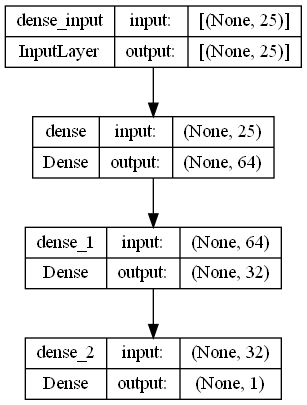

In [13]:
#Use the Keras Sequential Architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Our artificial neural network (ANN) architecture is structured with an input layer consisting of 25 neurons, each representing a feature from the dataset. Following the input layer, there are two hidden layers with 64 and 32 neurons respectivel. These layers employ the rectified linear unit (ReLU) activation function, introducing non-linearity to the model. The output layer, crucial for binary classification, contains a single neuron employing a sigmoid activation function. This configuration is optimal for predicting binary outcomes, making it suitable for tasks like determining flight delays, where the objective is to classify instances as delayed or not delayed based on the given features.

#### Using <b>Adam</b> optimizer and <b>binary_crossentropy</b> loss

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- Optimizer= 'adam' because Adam is a default choice for many deep learning tasks because it combines the benefits of both AdaGrad and RMSProp like faster convergence, and effective parameter updates, enhancing training efficiency.
- loss = 'binary_crossentropy'is an ideal choice for binary classification.
- metrics='accuracy' as accuracy it is a crucial measure for classification tasks to assess the model's ability to predict the correct class. 

In [15]:
# Train the Model (verbos = 2 to display the training progress for each epochs )
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 

Epoch 1/10
53698/53698 - 162s - loss: 0.6437 - accuracy: 0.6241 - val_loss: 0.6366 - val_accuracy: 0.6336 - 162s/epoch - 3ms/step
Epoch 2/10
53698/53698 - 166s - loss: 0.6343 - accuracy: 0.6355 - val_loss: 0.6319 - val_accuracy: 0.6380 - 166s/epoch - 3ms/step
Epoch 3/10
53698/53698 - 164s - loss: 0.6317 - accuracy: 0.6387 - val_loss: 0.6307 - val_accuracy: 0.6400 - 164s/epoch - 3ms/step
Epoch 4/10
53698/53698 - 160s - loss: 0.6297 - accuracy: 0.6411 - val_loss: 0.6308 - val_accuracy: 0.6393 - 160s/epoch - 3ms/step
Epoch 5/10
53698/53698 - 163s - loss: 0.6285 - accuracy: 0.6421 - val_loss: 0.6283 - val_accuracy: 0.6430 - 163s/epoch - 3ms/step
Epoch 6/10
53698/53698 - 160s - loss: 0.6275 - accuracy: 0.6432 - val_loss: 0.6266 - val_accuracy: 0.6440 - 160s/epoch - 3ms/step
Epoch 7/10
53698/53698 - 163s - loss: 0.6268 - accuracy: 0.6442 - val_loss: 0.6264 - val_accuracy: 0.6444 - 163s/epoch - 3ms/step
Epoch 8/10
53698/53698 - 162s - loss: 0.6263 - accuracy: 0.6444 - val_loss: 0.6257 - val_a

<b>Epoch:</b> is a one complete pass through the entire training dataset. During one epoch, the neural network's parameters (weights and biases) are updated based on the gradients of the loss function, computed on the entire training dataset.
<b>Loss</b> The loss metric represents the error between predicted and actual outcomes.
<b>Accuracy</b> The accuracy indicates the proportion of correct predictions.


The previous result displays the performance of a neural network model trained for flight delay prediction over ten epochs. Each epoch records the loss and accuracy for both the training and validation sets. The accuracy shows a consistent improvement while the loss decreases progressively, indicating the model's ability to learn from the training data and generalize well to the validation set.  

Let's create visual representations illustrating the loss and accuracy for both the training and validation sets.

In [16]:
def accuracy_loss_plot(history):
    '''
    To plot the model accuracy and loss for the training and validation set over epochs.
    '''
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], fontsize=12)
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'],fontsize=12)
    plt.show()

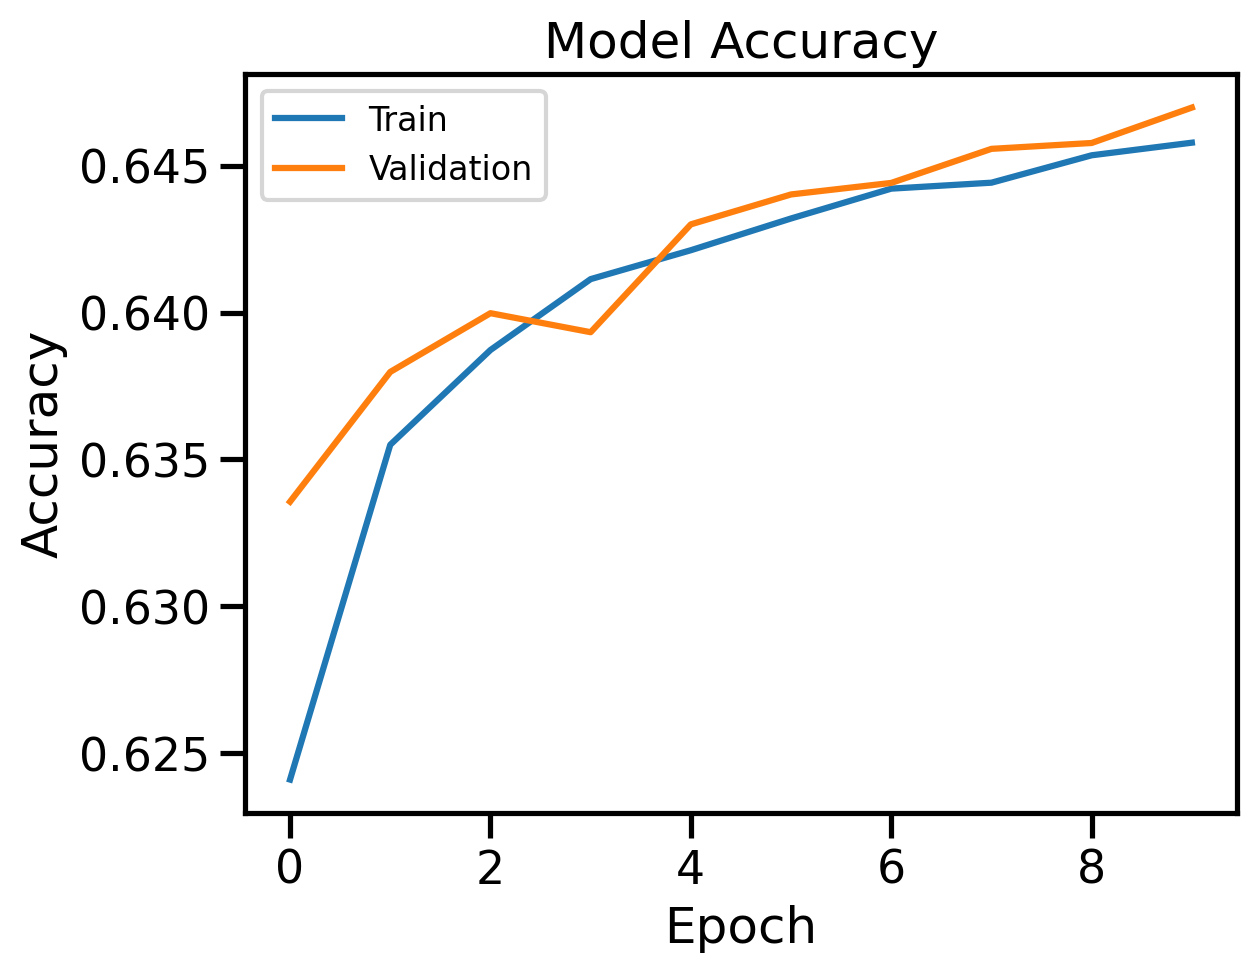

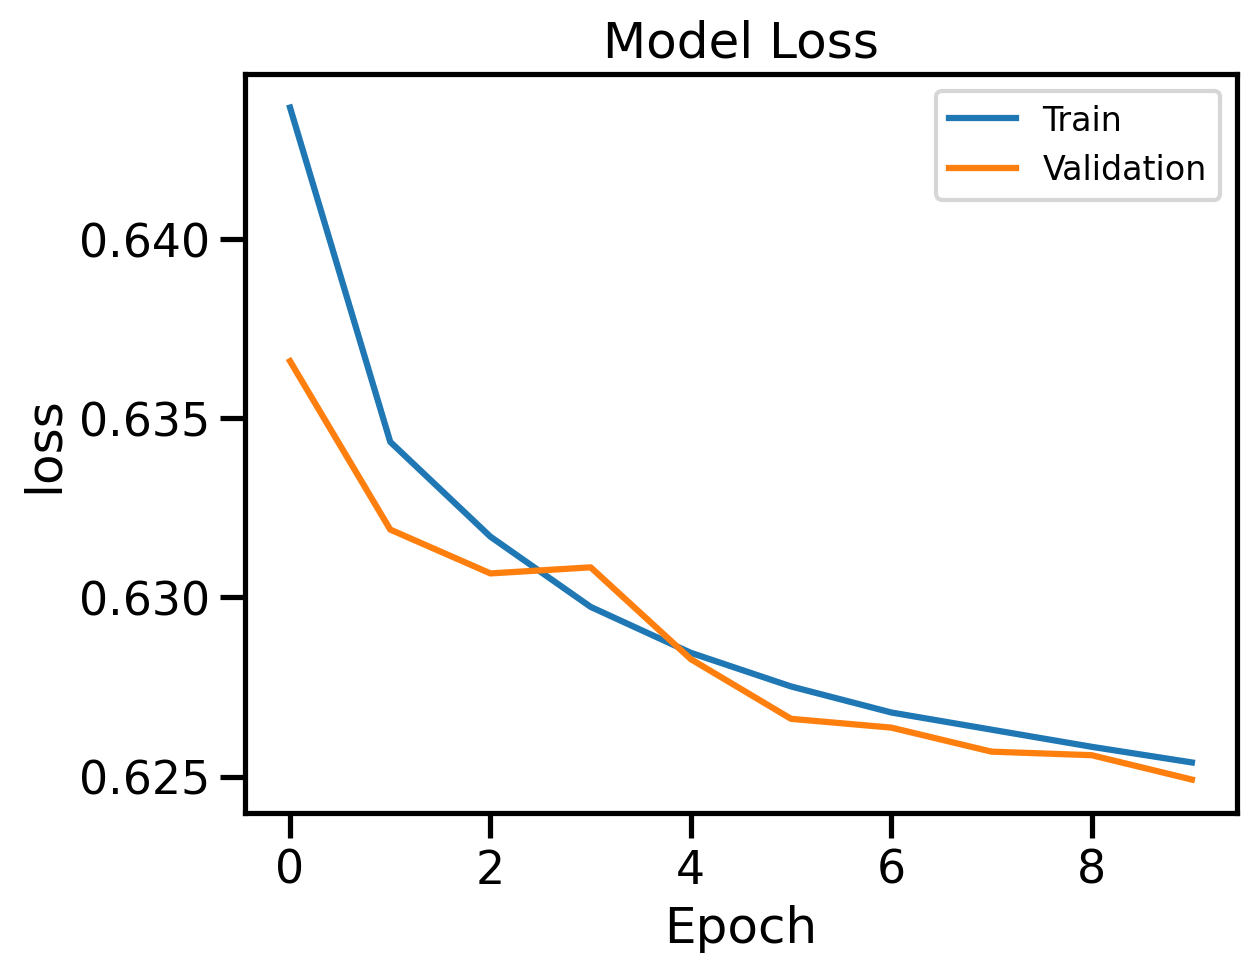

In [17]:
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history) 

In [ ]:
The validation loss is lower than the training loss 

<br>

#### Using <b>SGD</b> optimizer and <b>binary_crossentropy</b> loss

Let's change the optimizer to <b>Stochastic Gradient Descent (SGD)</b>. SGD is is a basic optimization algorithm used in training machine learning models. 

In [18]:
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Train the Model (verbos = 2 to display the training progress for each epochs )
history_SGD = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 

Epoch 1/10
53698/53698 - 155s - loss: 0.6224 - accuracy: 0.6490 - val_loss: 0.6228 - val_accuracy: 0.6485 - 155s/epoch - 3ms/step
Epoch 2/10
53698/53698 - 139s - loss: 0.6220 - accuracy: 0.6493 - val_loss: 0.6225 - val_accuracy: 0.6488 - 139s/epoch - 3ms/step
Epoch 3/10
53698/53698 - 140s - loss: 0.6218 - accuracy: 0.6494 - val_loss: 0.6226 - val_accuracy: 0.6488 - 140s/epoch - 3ms/step
Epoch 4/10
53698/53698 - 141s - loss: 0.6218 - accuracy: 0.6494 - val_loss: 0.6223 - val_accuracy: 0.6491 - 141s/epoch - 3ms/step
Epoch 5/10
53698/53698 - 133s - loss: 0.6217 - accuracy: 0.6495 - val_loss: 0.6225 - val_accuracy: 0.6488 - 133s/epoch - 2ms/step
Epoch 6/10
53698/53698 - 120s - loss: 0.6216 - accuracy: 0.6496 - val_loss: 0.6226 - val_accuracy: 0.6489 - 120s/epoch - 2ms/step
Epoch 7/10
53698/53698 - 119s - loss: 0.6216 - accuracy: 0.6496 - val_loss: 0.6224 - val_accuracy: 0.6486 - 119s/epoch - 2ms/step
Epoch 8/10
53698/53698 - 118s - loss: 0.6216 - accuracy: 0.6496 - val_loss: 0.6222 - val_a

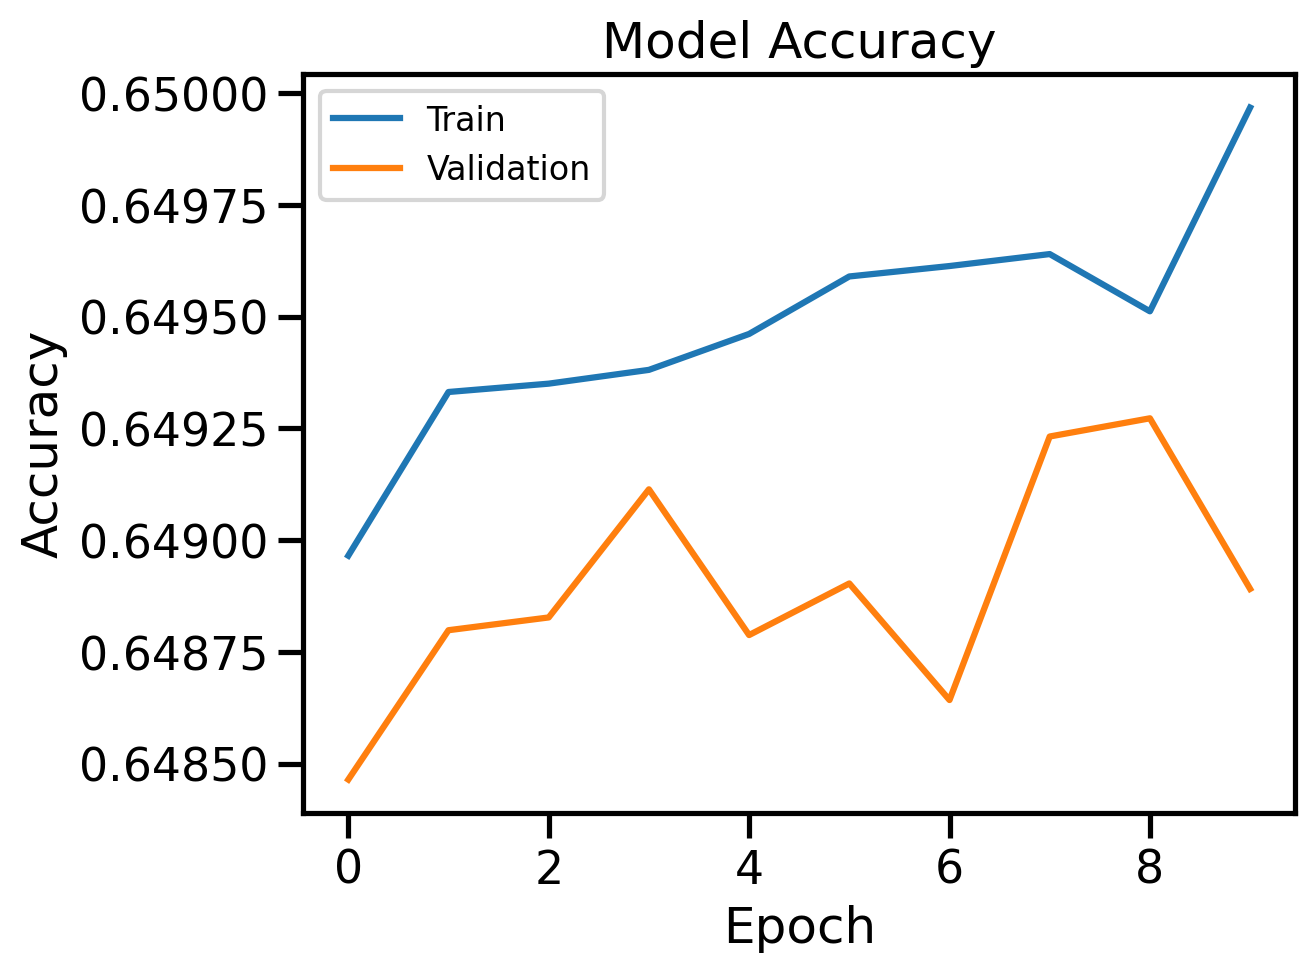

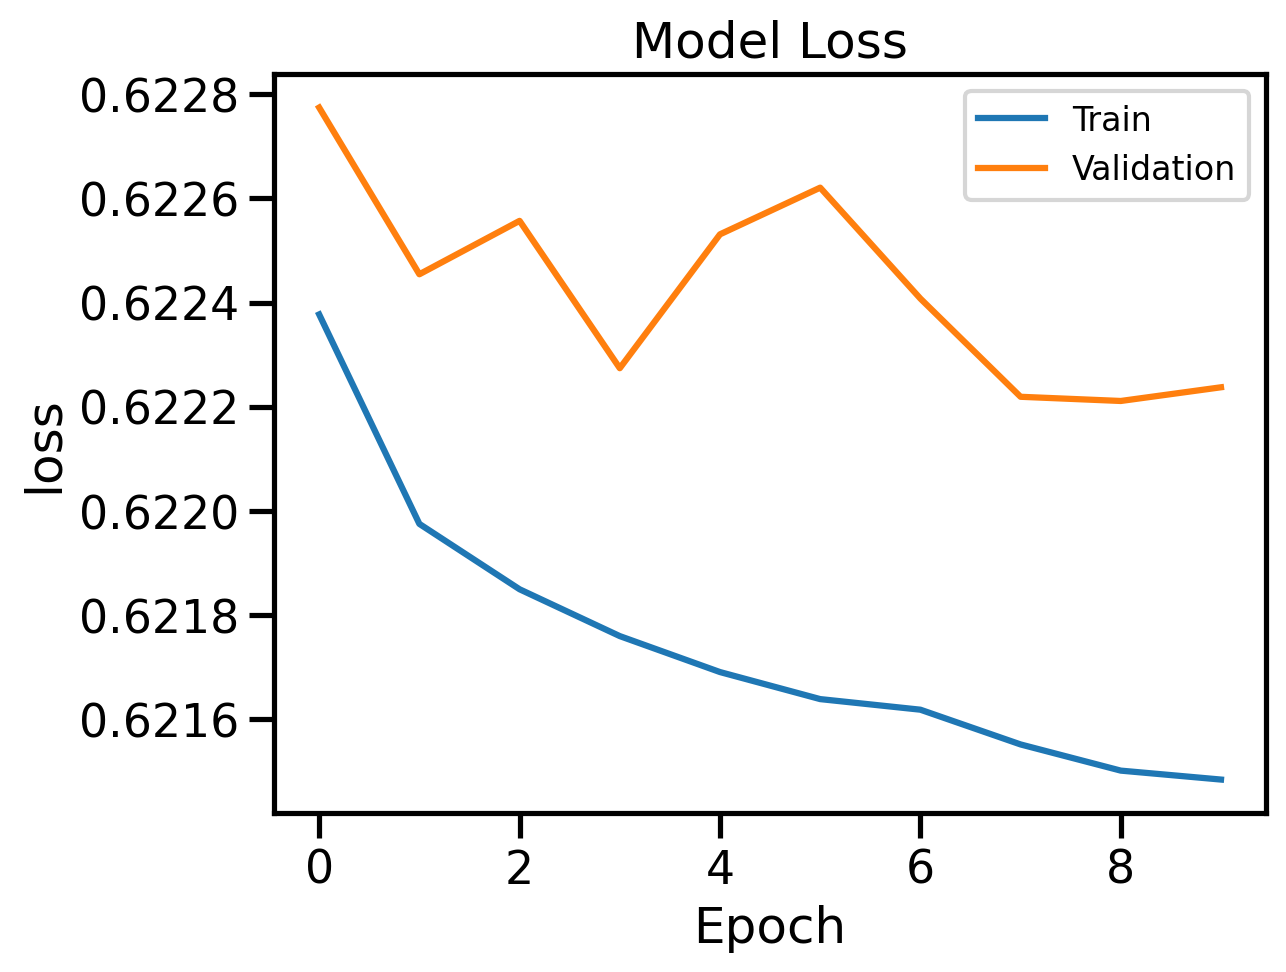

In [20]:
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history_SGD) 

In [ ]:
It's overfitting, The validation loss is 

<br>